# Shallow CNN model

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
from keras.models import load_model
import os
from sklearn.metrics import confusion_matrix
np.random.seed(7)

Using TensorFlow backend.


In [2]:
EMOTIONS = [
  'Angry',
  'Disgust',
  'Fear',
  'Happy',
  'Sad',
  'Surprise',
  'Neutral',
]

X_train = np.load('data files/X_train.npy')
y_train = np.load('data files/y_train.npy')

X_test = np.load('data files/X_test.npy')
y_test = np.load('data files/y_test.npy')

X_val = np.load('data files/X_val.npy')
y_val = np.load('data files/y_val.npy')

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (57418, 48, 48) y_train shape: (57418,)
X_test shape: (3589, 48, 48) y_test shape: (3589,)


In [3]:
#Prepare inputs for Keras CNN model

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')

X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_val = X_val.astype('float32')

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

y_train = np_utils.to_categorical(y_train, 7)
y_val = np_utils.to_categorical(y_val, 7)
y_test = np_utils.to_categorical(y_test, 7)

num_classes = y_test.shape[1]

X_train shape: (57418, 48, 48, 1) y_train shape: (57418,)
X_test shape: (3589, 48, 48, 1) y_test shape: (3589,)


In [ ]:
#Load the model if trained model present and evaluate directly on test data

if os.path.exists('models/shallow_model.h5'):
    model = load_model('models/shallow_model.h5')
else:
    print('No model to load !')

In [4]:
#Build CNN model

model = Sequential()

model.add(Conv2D(32, (5,5), input_shape=(48,48,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               7930368   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [5]:
# Visualize model plots and save in image format
from keras.utils import plot_model
import pydot
plot_model(model, to_file='models/shallow_model.png', show_shapes=True)

In [6]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
#Fit the model
history = model.fit(X_train,y_train,validation_data = (X_val, y_val), epochs=50,batch_size=50,verbose=1)

Train on 57418 samples, validate on 3589 samples
Epoch 1/50
57418/57418 [==============================] - 12s 209us/step - loss: 1.5405 - acc: 0.4102 - val_loss: 1.3808 - val_acc: 0.4578
Epoch 2/50
57418/57418 [==============================] - 9s 163us/step - loss: 1.3667 - acc: 0.4739 - val_loss: 1.3239 - val_acc: 0.4929
Epoch 3/50
57418/57418 [==============================] - 9s 162us/step - loss: 1.2924 - acc: 0.5054 - val_loss: 1.2909 - val_acc: 0.4993
Epoch 4/50
57418/57418 [==============================] - 9s 163us/step - loss: 1.2249 - acc: 0.5327 - val_loss: 1.2760 - val_acc: 0.5029
Epoch 5/50
57418/57418 [==============================] - 9s 162us/step - loss: 1.1619 - acc: 0.5526 - val_loss: 1.2763 - val_acc: 0.5130
Epoch 6/50
57418/57418 [==============================] - 9s 162us/step - loss: 1.1072 - acc: 0.5753 - val_loss: 1.2632 - val_acc: 0.5227
Epoch 7/50
57418/57418 [==============================] - 9s 162us/step - loss: 1.0457 - acc: 0.5997 - val_loss: 1.2805 - 


===> Results <===

Training Accuracy: 87.95%
Validation Accuracy: 52.24%


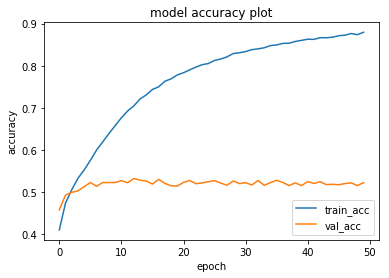

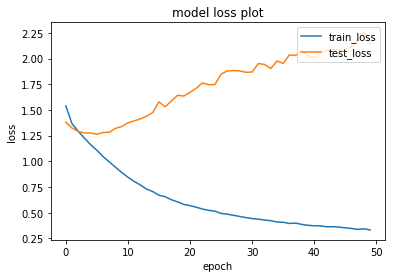


Evaluating model on test data
3589/3589 [==============================] - 0s 51us/step

Test Accuracy: 52.02%

Loss: 2.19


In [8]:
# Save the model in HDF5 file 
model.save('models/shallow_model.h5')

# Output training results

train_acc = history.history['acc']
val_acc = history.history['val_acc']

print("\n===> Results <===")
print("\nTraining Accuracy: %.2f%%" % ((train_acc[-1])*100))
print("Validation Accuracy: %.2f%%" % ((val_acc[-1])*100))

# Plot accuracy result
plt.plot(train_acc)
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.plot(val_acc)
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper right')
plt.show()

#Evaluate model performance on test data
print("\nEvaluating model on test data")
scores = model.evaluate(X_test,y_test)

print("\nTest Accuracy: %.2f%%" % (scores[1]*100))
print("\nLoss: %.2f" % (scores[0]))

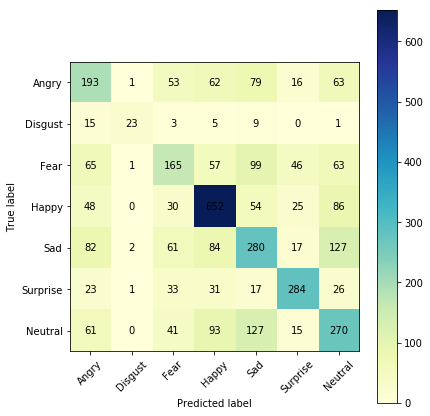

In [9]:
print("\nConfusion matrix for above results:")

y_prob = model.predict(X_test, batch_size=50, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
   # matplotlib.rcParams.update({'font.size': 14})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')

    ticks = np.arange(len(EMOTIONS))
    ax.set_xticks(ticks)
    ax.set_xticklabels(EMOTIONS, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(EMOTIONS)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)